# Aumento de datos


Sabemos que el potencial de los modelos de *deep learning* está limitado por la cantidad de datos disponibles para entrenar. En general, se necesitan grandes volúmenes de datos: los modelos de visión más avanzados se entrenan con miles de millones de imágenes, mientras que los modelos de procesamiento de lenguaje natural (LLM) utilizan billones de *tokens*.

Obtener datos de calidad y etiquetados suele ser una tarea compleja y costosa.

¿Es posible aumentar artificialmente nuestros datos mediante transformaciones ingeniosas?

¡Sí! Es posible y se conoce como **aumento de datos**. En esta sección, exploraremos diferentes métodos de aumento de datos para imágenes y presentaremos brevemente las posibilidades para el procesamiento de lenguaje natural (NLP) y el audio.


## Aumento de datos para imágenes


Las técnicas de **aumento de datos** presentadas en esta sección han demostrado ser útiles para el entrenamiento de modelos de *deep learning*. Sin embargo, es importante ser cauteloso, ya que algunos tipos de aumento de datos pueden no ser adecuados para nuestro objetivo de entrenamiento (por ejemplo, si queremos detectar personas acostadas, debemos evitar rotar la imagen 90 grados).

Para introducir los diferentes métodos de aumento de datos, utilizaremos PyTorch, específicamente la librería `torchvision`, que ofrece una amplia variedad de técnicas de aumento de datos.


Comencemos con nuestra imagen base:


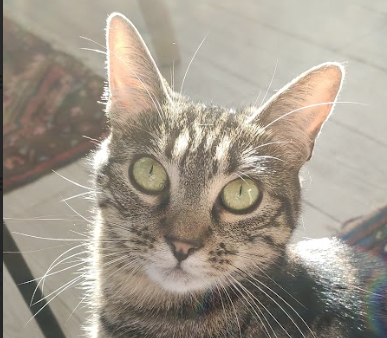

In [1]:
from PIL import Image
image_pil=Image.open("images/tigrou.png")
image_pil

Transformemos nuestra imagen en un tensor de PyTorch.


In [2]:
import torchvision.transforms as T 
transform=T.Compose([T.ToTensor(),T.Resize((360,360))])
image=transform(image_pil)[0:3,:,:]

/home/aquilae/anaconda3/envs/dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Inversión horizontal/vertical y rotación


Una primera idea para el **aumento de datos** es aplicar transformaciones como la inversión de la imagen (horizontal o vertical) o la rotación de la misma. Por ejemplo, un gato boca abajo sigue siendo un gato.

**Consideración importante**: si queremos diferenciar entre las clases "gato" y "gato boca abajo", no podríamos usar esta técnica. Siempre debemos asegurarnos de que la transformación sea adecuada para nuestro objetivo.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


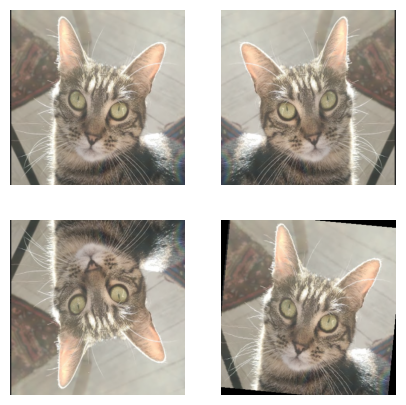

In [3]:
import matplotlib.pyplot as plt

horiz_flip=T.Compose([T.RandomHorizontalFlip(p=1)])
image_horiz_flip=horiz_flip(image)
vert_flip=T.Compose([T.RandomVerticalFlip(p=1)])
image_vert_flip=vert_flip(image)
rot=T.Compose([T.RandomRotation(degrees=90)])
image_rot=rot(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_horiz_flip.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_vert_flip.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_rot.permute(1,2,0))
plt.axis("off")
plt.show()

### Recorte de imagen


Otra técnica consiste en **recortar** una parte de la imagen y usar ese recorte como entrada. Existen dos opciones principales: *CenterCrop* (recorte centrado) y *RandomCrop* (recorte aleatorio en la imagen).

**Consideración importante**: con este método, debemos asegurarnos de que el objeto de interés esté presente en el recorte. Si el tamaño del recorte es demasiado pequeño o el objeto no ocupa un espacio significativo en la imagen, este tipo de aumento de datos puede ser perjudicial (ver la última imagen del ejemplo).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


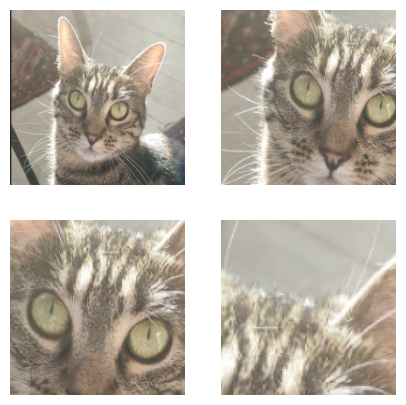

In [4]:
crop=T.Compose([T.RandomCrop(200)])
image_crop=crop(image)
center_crop=T.Compose([T.CenterCrop(150)])
image_center_crop=center_crop(image)

crop_small=T.Compose([T.RandomCrop(100)])
image_crop_small=crop_small(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_crop.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_center_crop.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_crop_small.permute(1,2,0))
plt.axis("off")
plt.show()

### Contraste, brillo, saturación y tono


También podemos modificar los valores de **brillo** ($brightness$), **contraste** ($contrast$), **saturación** ($saturation$) y **tono** ($hue$) utilizando la transformación [ColorJitter](https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


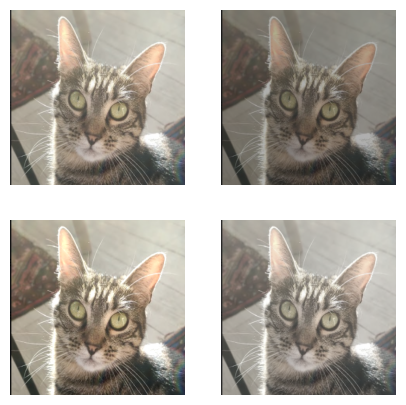

In [87]:
bright=T.Compose([T.ColorJitter(brightness=0.8)])
image_bright=bright(image)
contr=T.Compose([T.ColorJitter(contrast=0.8)])
image_contr=contr(image)

satur=T.Compose([T.ColorJitter(saturation=0.8)])
image_satur=satur(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_bright.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_contr.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_satur.permute(1,2,0))
plt.axis("off")
plt.show()

### Otras transformaciones


Existen muchas otras transformaciones posibles. Algunas opciones incluyen:
- Eliminar una parte de la imagen.
- Añadir un *padding* (relleno) alrededor de la imagen.
- Aplicar *solarización* a la imagen.
- Definir una transformación afín específica para modificar la imagen.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


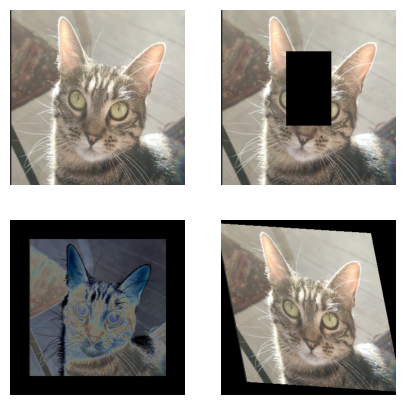

In [85]:
erase=T.Compose([T.RandomErasing(p=1)])
image_erase=erase(image)
solar=T.Compose([T.Pad(50),T.RandomSolarize(0.5,p=1)])
image_solar=solar(image)

affin=T.Compose([T.RandomAffine(degrees=30,scale=(0.8,1.2),shear=30)])
image_affin=affin(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_erase.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_solar.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_affin.permute(1,2,0))
plt.axis("off")
plt.show()

El **aumento de datos** es una técnica muy útil que permite incrementar artificialmente el conjunto de datos de entrenamiento. Esto facilita el entrenamiento de modelos más grandes sin caer en *overfitting*. En la práctica, suele ser beneficioso incluir estas técnicas en el entrenamiento de redes neuronales, aunque siempre con precaución para evitar resultados no deseados.

Se recomienda probar las transformaciones de aumento de datos en algunas muestras del conjunto de datos para asegurarse de que los resultados sean adecuados.

**Nota**: existen otros métodos de aumento de datos, como la adición de ruido a las imágenes. Puedes consultar la lista completa de transformaciones disponibles en la [documentación de PyTorch](https://pytorch.org/vision/stable/transforms.html).


## Aumento de datos para texto


También es posible aplicar **aumento de datos** en el procesamiento de lenguaje natural (NLP). Algunas técnicas incluyen:
- Cambiar aleatoriamente la posición de ciertas palabras en una frase (puede hacer que el modelo sea más robusto, pero debe hacerse con precaución).
- Reemplazar algunas palabras por sinónimos.
- Parafrasear el texto.
- Añadir o eliminar palabras aleatoriamente en la frase.

Estas técnicas no son adecuadas para todos los problemas de NLP y deben usarse con cuidado.

**Nota**: con la llegada de los modelos de lenguaje grandes (LLM), es posible ajustar (*fine-tuning*) modelos de manera efectiva incluso con muy pocos datos, lo que reduce la necesidad de aplicar aumento de datos en NLP.


## Aumento de datos para audio


En el ámbito del audio, también puede ser útil aplicar **aumento de datos**. Algunas técnicas para incrementar artificialmente los datos de audio incluyen:
- Añadir ruido al audio (gaussiano o aleatorio) para mejorar el rendimiento del modelo en situaciones complejas.
- Desplazar el inicio del registro de audio (*time shift*).
- Modificar la velocidad de reproducción del audio.
- Cambiar el tono del sonido (hacerlo más agudo o más grave).